In [1]:
import ode_explorer
from ode_explorer.model import ODEModel
from ode_explorer.integrator import Integrator
from ode_explorer.stepfunctions import RungeKutta4
from ode_explorer.metrics import DistanceToSolution

import numpy as np
import pandas as pd

from typing import Union

## Model definition

In [2]:
def ode_func(t: float, y: Union[float, np.ndarray], lamb: float):
    return - lamb * y

## Initial state

In [3]:
t_0 = 0.0
y_0 = 1.0  # np.ones(100)
lamb = 0.5

## Model construction

In [4]:
model = ODEModel(ode_fn=ode_func, fn_args={"lamb": lamb})

## Integrator construction

In [5]:
integrator = Integrator()

initial_state = {"t": t_0, "y": y_0}

Creating an Integrator instance.
INFO:ode_explorer.integrator.Integrator:Creating an Integrator instance.
Created an Integrator instance.
INFO:ode_explorer.integrator.Integrator:Created an Integrator instance.


## Integration

In [6]:
integrator.integrate_const(model=model,
                           step_func=RungeKutta4(output_format="zipped"),
                           initial_state=initial_state,
                           h=0.001,
                           num_steps=10000,
                           verbosity=1)

Starting integration.
INFO:ode_explorer.integrator.Integrator:Starting integration.
100%|██████████| 10000/10000 [00:00<00:00, 21795.95it/s]
Finished integration.
INFO:ode_explorer.integrator.Integrator:Finished integration.


In [7]:
result = integrator.return_result_data(model=model)

result

,t,y
0,0.000,1.000000
1,0.001,0.999500
2,0.002,0.999000
3,0.003,0.998501
4,0.004,0.998002
...,...,...
9996,9.996,0.006751
9997,9.997,0.006748
9998,9.998,0.006745
9999,9.999,0.006741


<AxesSubplot:xlabel='t'>

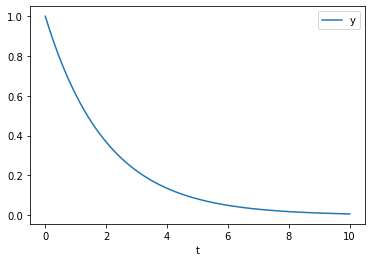

In [14]:
result.plot(x="t", y="y")

## Solution distance experiment

In [9]:
def sol(t):
    return np.exp(-lamb * t)

In [10]:
integrator.integrate_const(model=model,
                           step_func=RungeKutta4(output_format="zipped"),
                           initial_state=initial_state,
                           h=0.001,
                           num_steps=10000,
                           verbosity=1,
                           metrics=[DistanceToSolution(solution=sol, name="l2_distance")])

Starting integration.
INFO:ode_explorer.integrator.Integrator:Starting integration.
100%|██████████| 10000/10000 [00:00<00:00, 12524.36it/s]
Finished integration.
INFO:ode_explorer.integrator.Integrator:Finished integration.


In [11]:
metrics = integrator.return_metrics(model=model)

metrics

,iteration,step_size,l2_distance
0,0,0.001,0.000000e+00
1,1,0.001,0.000000e+00
2,2,0.001,0.000000e+00
3,3,0.001,0.000000e+00
4,4,0.001,0.000000e+00
...,...,...,...
9996,9996,0.001,3.417405e-16
9997,9997,0.001,3.426079e-16
9998,9998,0.001,3.443426e-16
9999,9999,0.001,3.460773e-16


<AxesSubplot:xlabel='iteration'>

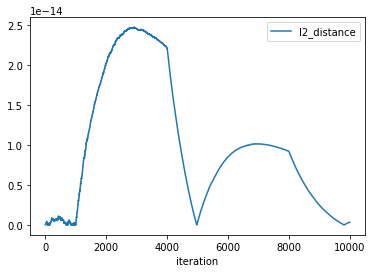

In [12]:
metrics.plot(x="iteration", y="l2_distance")